In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

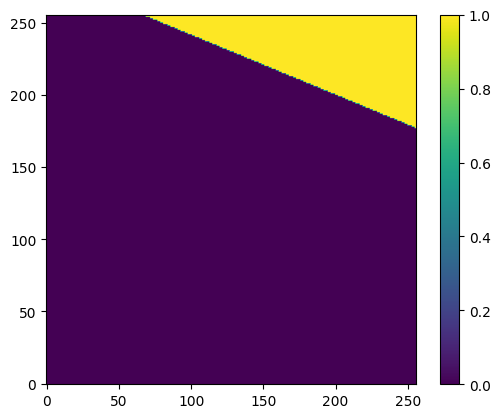

In [50]:
aspt = 1
data = np.loadtxt("./output/bound-0.txt")
plt.imshow(data,vmin=0,vmax=1,aspect=aspt,origin='lower')
plt.colorbar()

(0.0, 255.5)

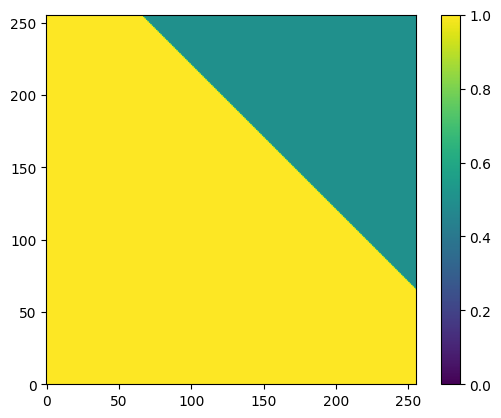

In [51]:
aspt = 1
data = np.loadtxt("./output/rho-0.txt")
plt.imshow(data,vmin=0,aspect=aspt,origin='lower')
plt.colorbar()

v = np.loadtxt("./output/v-0.txt")
u = np.loadtxt("./output/u-0.txt")

m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)

# plt.streamplot(x,y,u,v, density=1, color='tab:red')
plt.ylim(ymin=0)

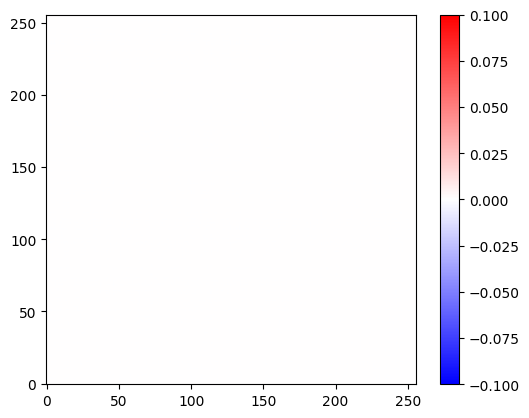

In [52]:
data = np.loadtxt("./output/By-0.txt")
plt.imshow(data,cmap='bwr',aspect=aspt,origin='lower')
plt.colorbar()

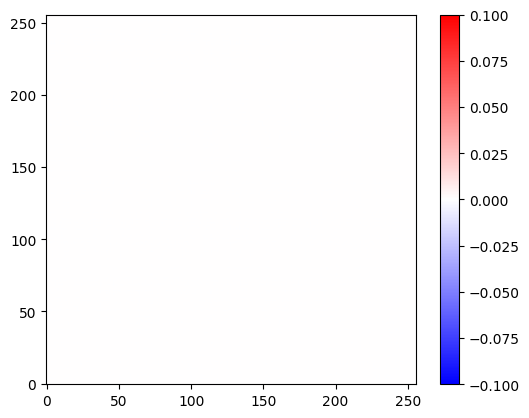

In [53]:
data = np.loadtxt("./output/By-0.txt")
plt.imshow(data,cmap='bwr',aspect=aspt,origin='lower')
plt.colorbar()

# Final Output

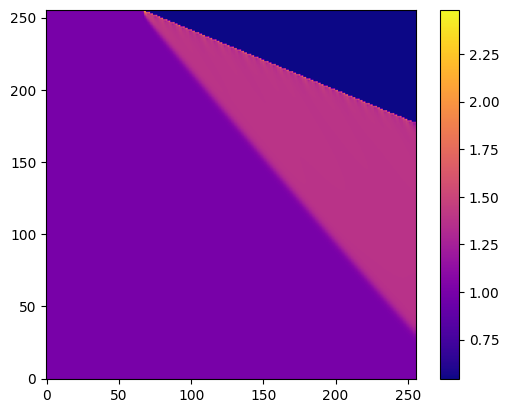

In [66]:
data = np.loadtxt("./output/p.txt")
plt.imshow(data,aspect=aspt,cmap='plasma',origin='lower')
plt.colorbar()

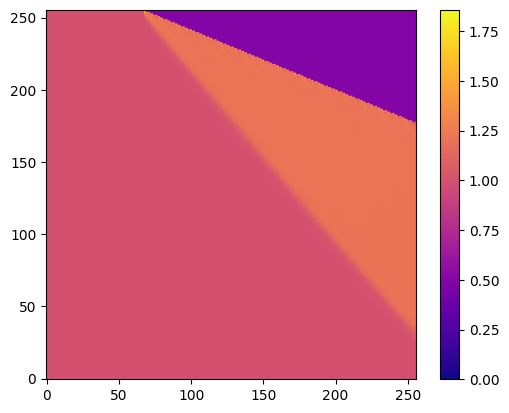

In [65]:
data = np.loadtxt("./output/rho.txt")
plt.imshow(data,vmin=0,aspect=aspt,cmap='plasma',origin='lower')
plt.colorbar()

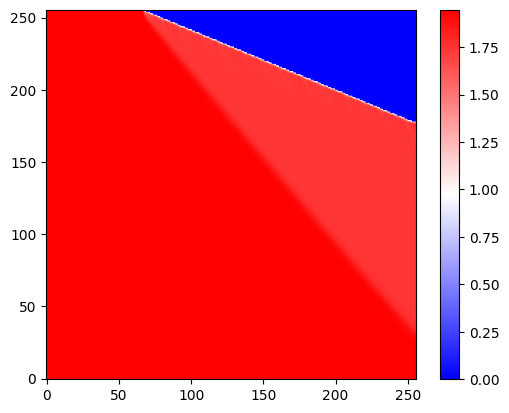

In [64]:
data = np.loadtxt("./output/u.txt")
plt.imshow(data,cmap='bwr',aspect=aspt,origin='lower')
plt.colorbar()

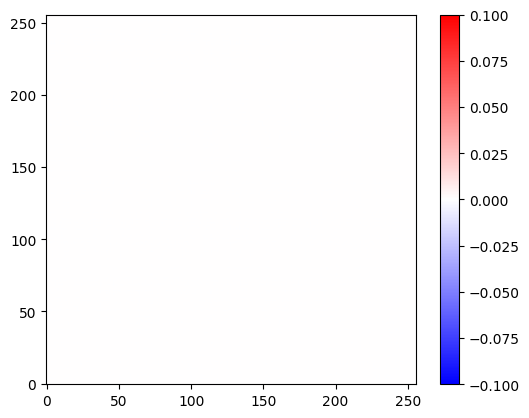

In [57]:
data = np.loadtxt("./output/By.txt")
plt.imshow(data,cmap='bwr',aspect=aspt,origin='lower')
plt.colorbar()

# Output at given time

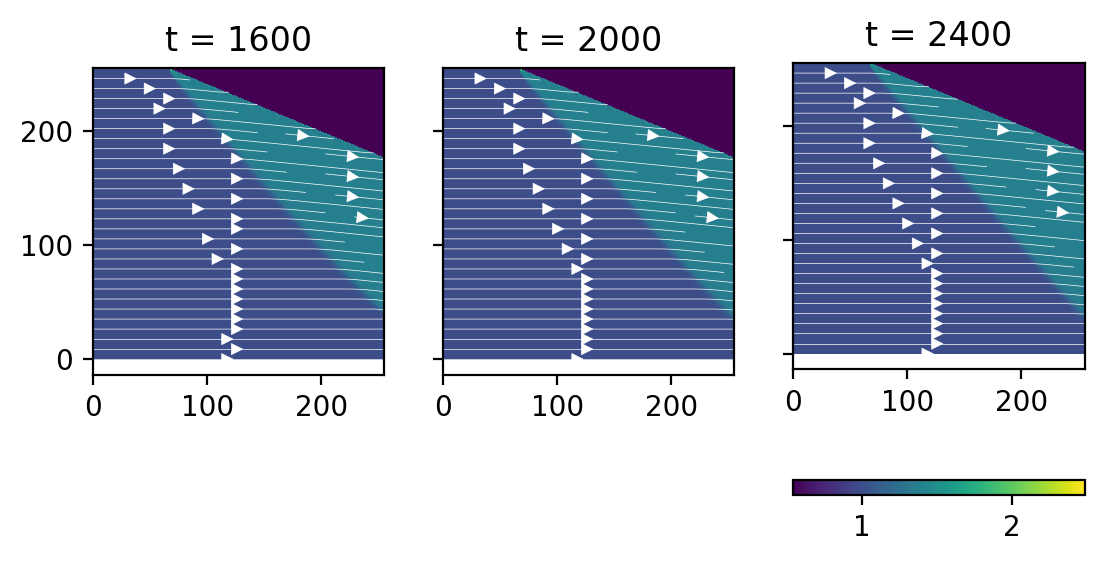

In [62]:
t = [1600,2000,2400]
field = 'p'

fig, axs = plt.subplots(1,len(t),sharey=True,dpi=200)
for ii in range(len(t)):
    data = np.loadtxt('./output/' + field + '-' + str(t[ii]) + '.txt')
    im = axs[ii].imshow(data,aspect=aspt,origin='lower')
    v = np.loadtxt('./output/v'+'-' + str(t[ii]) + '.txt')
    u = np.loadtxt('./output/u'+'-' + str(t[ii]) + '.txt')
    axs[ii].set_title('t = ' + str(t[ii]))
    m,n = u.shape
    x, y = np.arange(0,n,1), np.arange(0,m,1)

    axs[ii].streamplot(x,y,u,v, density=1, color='w',linewidth=0.25,cmap='viridis')
    
plt.colorbar(im,orientation="horizontal")